In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
from pandas import DataFrame, Series
from datetime import datetime

In [3]:
# verifying the env variable DFDATA
DFdata = os.getenv('DFDATA')
print(DFdata)

/gws/open/NYCOpenData/nycopendata/data


In [4]:
#verifying the env variable PUIdata
PUIdata = os.getenv('PUIDATA')

print (PUIdata)

/home/cusp/sn2495/PUIdata


In [45]:
# Read the data into a dataframe

df = pd.read_csv(DFdata + "/de8q-estm/1439391972/de8q-estm")

In [46]:
#show the first few rows of the dataframe
df.head()

,event_name,event_description,event_url,local_start_time,local_end_time,capacity,status,category_name,subcategory_name,format_name,...,ticket_name,ticket_description,ticket_on_sale_status,ticket_quantity_total,ticket_quantity_sold,ticket_sales_start,ticket_sales_end,organizer_name,organizer_description,organizer_url
0,"Getting Ahead, Bronx 8/4, 8/11, 8/18,8/25, 09/1",Getting Ahead on Your Personal Finances \nLear...,http://www.eventbrite.com/e/getting-ahead-bron...,08/04/2015 06:00:00 PM,09/01/2015 08:00:00 PM,20,started,Business & Professional,NaN,"Class, Training, or Workshop",...,Register,NaN,UNAVAILABLE,20,17,06/17/2015 08:00:00 PM +0000,08/04/2015 10:00:00 PM +0000,NYC Department of Small Business Services,The NYC Department of Small Business Services ...,http://www.eventbrite.com/o/nyc-department-of-...
1,"Mastering Marketing (3-session course), Bronx ...",Mastering Marketing \nLearn how to get the bes...,http://www.eventbrite.com/e/mastering-marketin...,08/11/2015 05:30:00 PM,08/13/2015 08:00:00 PM,25,started,Business & Professional,NaN,"Class, Training, or Workshop",...,Register,Registration is free.,UNAVAILABLE,25,10,06/17/2015 08:00:00 PM +0000,08/11/2015 10:00:00 PM +0000,NYC Department of Small Business Services,The NYC Department of Small Business Services ...,http://www.eventbrite.com/o/nyc-department-of-...
2,"QuickBooks Quick Review, Lower Manhattan 8/12/15",QuickBooks Quick Review \nGet a quick refreshe...,http://www.eventbrite.com/e/quickbooks-quick-r...,08/12/2015 01:00:00 PM,08/12/2015 05:00:00 PM,25,live,Business & Professional,NaN,"Class, Training, or Workshop",...,Register,NaN,SOLD_OUT,25,24,12/05/2013 09:00:00 PM +0000,08/13/2015 05:00:00 PM +0000,NYC Department of Small Business Services,The NYC Department of Small Business Services ...,http://www.eventbrite.com/o/nyc-department-of-...
3,"Accessing Financing Webinar, Lower Manhattan 8...",Accessing Financing Webinar \nNYC Business Sol...,http://www.eventbrite.com/e/accessing-financin...,08/12/2015 01:00:00 PM,08/12/2015 02:30:00 PM,120,live,Business & Professional,NaN,"Class, Training, or Workshop",...,Register,Registration is free.,UNAVAILABLE,120,41,12/05/2013 09:00:00 PM +0000,08/11/2015 07:30:00 PM +0000,NYC Department of Small Business Services,The NYC Department of Small Business Services ...,http://www.eventbrite.com/o/nyc-department-of-...
4,"QuickBooks Quick Review, Upper Manhattan 8/12/15",QuickBooks Quick Review \nGet a quick refreshe...,http://www.eventbrite.com/e/quickbooks-quick-r...,08/12/2015 04:00:00 PM,08/12/2015 08:00:00 PM,20,live,Business & Professional,NaN,"Class, Training, or Workshop",...,Register,Registration is free.,SOLD_OUT,20,18,03/20/2015 08:00:00 PM +0000,08/12/2015 11:00:00 PM +0000,NYC Department of Small Business Services,The NYC Department of Small Business Services ...,http://www.eventbrite.com/o/nyc-department-of-...


In [47]:
df.columns.values

array(['event_name', 'event_description', 'event_url', 'local_start_time',
       'local_end_time', 'capacity', 'status', 'category_name',
       'subcategory_name', 'format_name', 'address_1', 'address_2', 'city',
       'region', 'postal_code', 'country', 'venue_name', 'ticket_name',
       'ticket_description', 'ticket_on_sale_status',
       'ticket_quantity_total', 'ticket_quantity_sold',
       'ticket_sales_start', 'ticket_sales_end', 'organizer_name',
       'organizer_description', 'organizer_url'], dtype=object)

In [48]:
# drop the 'NYC Consumption(Million gallons per day)' column from the dataframe
df.drop(['event_name', 'event_description', 'event_url',
       'local_end_time','status', 'category_name',
       'subcategory_name', 'format_name', 'address_1', 'address_2', 'city',
       'region', 'postal_code', 'country', 'venue_name', 'ticket_name',
       'ticket_description', 'ticket_on_sale_status',
       'ticket_quantity_total', 'ticket_quantity_sold',
       'ticket_sales_start', 'ticket_sales_end', 'organizer_name',
       'organizer_description', 'organizer_url'], axis=1, inplace=True)

In [49]:
df.head()

,local_start_time,capacity
0,08/04/2015 06:00:00 PM,20
1,08/11/2015 05:30:00 PM,25
2,08/12/2015 01:00:00 PM,25
3,08/12/2015 01:00:00 PM,120
4,08/12/2015 04:00:00 PM,20


In [50]:
pd.to_datetime(df['local_start_time']).head()

0   2015-08-04 18:00:00
1   2015-08-11 17:30:00
2   2015-08-12 13:00:00
3   2015-08-12 13:00:00
4   2015-08-12 16:00:00
Name: local_start_time, dtype: datetime64[ns]

In [51]:
df['local_start_time'] = pd.to_datetime(df['local_start_time'])

df.head()

,local_start_time,capacity
0,2015-08-04 18:00:00,20
1,2015-08-11 17:30:00,25
2,2015-08-12 13:00:00,25
3,2015-08-12 13:00:00,120
4,2015-08-12 16:00:00,20


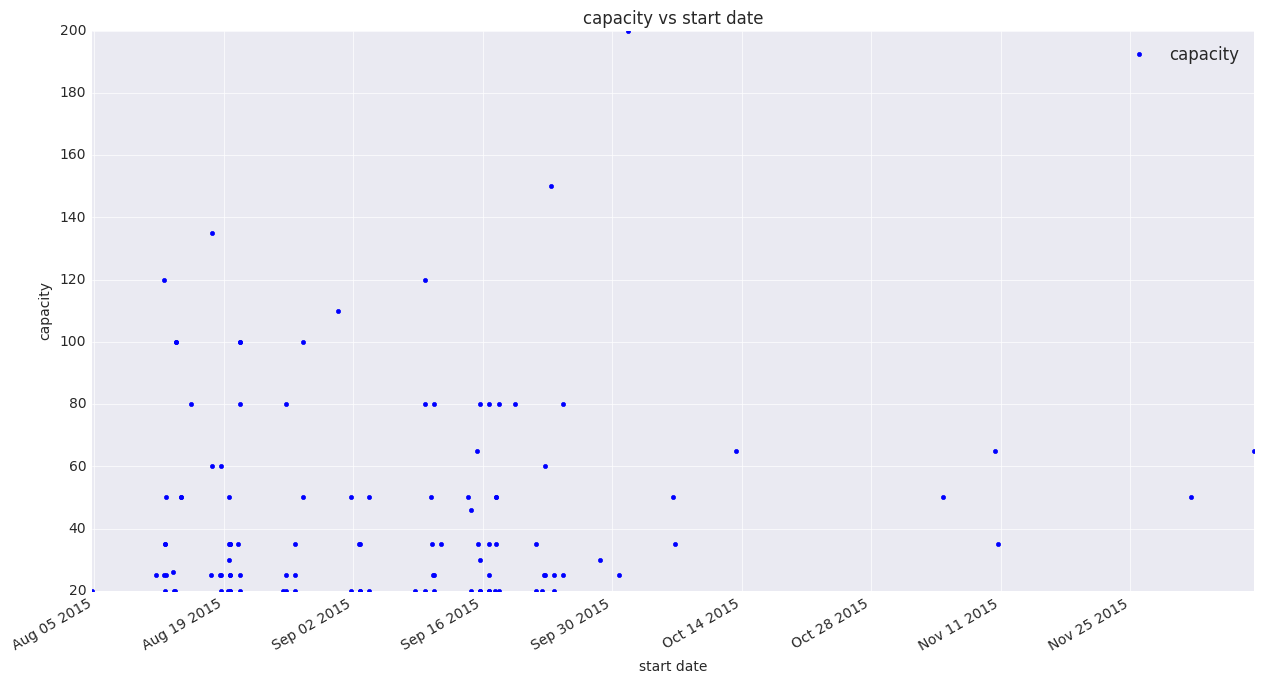

In [78]:
#scatter plot
df.plot(x='local_start_time', y='capacity', style='.', figsize=(15,8))
plt.xlabel("start date")
plt.ylabel("capacity")
plt.title("capacity vs start date")
